# Load and save data to files
We can categorize files into 2 main categories, text files and binary files.
- Text files store text / characters in a human readable format.
- Binary files store byte data (1's and 0's) that only computers understand. (Won't go into this aspect during this course)

## Common text based file formats to store data
- .txt
- .csv
- .json

## File names and file paths
A file name usually has two parts, the name and the extension, separated by a period (name.extension).

E.g. hello.txt, data.json, myimage.jpg

Paths can be expressed as either relative or absolute:
- **Absolute:** Full path to access a file or folder, e.g. C:\users\fredrik\desktop\myfile.txt
- **Relative:** Relative from the current active folder: data/data.json

## File modes
It's possible to open a file in python in different modes:
- **'r'**: for reading
- **'w'**: for writing
- **'a'**: for appending

## Open file for reading

In [10]:
file = open("..\..\data\hello.txt")

content = file.read()
file.close()

print(content)

BLobba fluffa moppa luuuuuuulMore dataNy rad

Kealllle


## Open with context management

In [13]:
# Better solution with automatic file closing

with open("..\..\data\hello.txt") as file:
    content = file.read()

print(content)

BLobba fluffa moppa luuuuuuulMore dataNy rad

Kealllle
Testeslitest


## Open file for writing

In [12]:
with open("..\..\data\hello.txt","a") as file: 
    new_content = input("Enter text: ")
    file.write("\n" + new_content)


## Mini-uppgift
Skapa ett program som har en tom lista. När programmet körs får användaren mata in namn (input) i en loop tills användaren matar in en tom rad. När den är klar skrivs alla namn ut på skärmen och listan sparas till en fil, med ett namn på varje rad. Nästa gång man startar programmet läser den in de befintliga namnen och skriver ut dem.

In [6]:
import os

file_path = "..\\..\\data\\names.txt"
name_list = []

if os.path.exists(file_path):
    with open(file_path) as file:
        name_list = file.readlines()
    for i, name in enumerate(name_list):
        if name == " \n":
            name_list.pop(i)
    print(f"Current list of names:")
    for name in name_list:
        if name == " ":
            del name
        name = name.strip("\\n")
        print(f"{name}")

while(True):
    new_name=input("Enter names one at a time, abort by entering nothing: ")
    if new_name:
        name_list.append(new_name)
    else:
        break

with open(file_path,"w") as file: 
    file.writelines([name + " \n" for name in name_list ])

print(f"{[name for name in name_list]}")    
print("Names are saved!")

Current list of names:
Mikael 

Pelle 

['Mikael \n', 'Pelle \n']
Names are saved!


## Write .CSV file

In [51]:
students = [
    {
        "name": "Adam",
        "class": "AI23",
        "email": "adam@gmail.com",
    },
    {
        "name": "Kalle",
        "class": "AI23",
        "email": "kalle@gmail.com",
    },
    {
        "name": "Eva",
        "class": "AI23",
        "email": "eva@gmail.com",
    },
    ]
print(students)

with open("..\\..\\data\\students.csv", "w") as file:
    file.write("name,class,email\n")
    for student in students:
        file.write(f"{student['name']},{student['class']},{student['email']}\n")

[{'name': 'Adam', 'class': 'AI23', 'email': 'adam@gmail.com'}, {'name': 'Kalle', 'class': 'AI23', 'email': 'kalle@gmail.com'}, {'name': 'Eva', 'class': 'AI23', 'email': 'eva@gmail.com'}]


## Using CSV package

In [48]:
import csv

students = []

with open("..\\..\\data\\students.csv") as file:
    reader = csv.DictReader(file)

    for row in reader:
        students.append({"name": row["name"], "class": row["class"], "email": row["email"]})

print(students)

[{'name': 'Adam', 'class': 'AI23', 'email': 'adam@gmail.com'}, {'name': 'Kalle', 'class': 'AI23', 'email': 'kalle@gmail.com'}, {'name': 'Eva', 'class': 'AI23', 'email': 'eva@gmail.com'}]


## Json serialization and deserialization

In [8]:
import json

teacher = {
    "firstname": "Fredrik",
    "lastname": "Johansson",
    "age": 42,
    "languages": ["Python","C#","JavaScript"],
    "contactinfo": {
        "phone": "0702345634",
        "email": [
            "fredrik@gmail.com",
            "fredrik.johansson@hotmail.com",
        ]
    },
}

serialized_data = json.dumps(teacher, indent=4)
#print(serialized_data)

with open("..\\..\\data\\teacher.json","w") as file:
    file.write(serialized_data)

### Read .json file

In [11]:
with open("..\\..\\data\\teacher.json") as file:
    data = file.read()

teacher = json.loads(data) # s in loads indicates dump as string

print(teacher)

{'firstname': 'Fredrik', 'lastname': 'Johansson', 'age': 42, 'languages': ['Python', 'C#', 'JavaScript'], 'contactinfo': {'phone': '0702345634', 'email': ['fredrik@gmail.com', 'fredrik.johansson@hotmail.com']}}


### Example reading open dataset from kaggle

205
{'aspiration': 'std', 'body-style': 'convertible', 'bore': 3.47, 'city-mpg': 21.0, 'compression-ratio': '9', 'curb-weight': 2548, 'drive-wheels': 'rwd', 'engine-location': 'front', 'engine-size': 130.0, 'engine-type': 'dohc', 'fuel-system': 'mpfi', 'fuel-type': 'gas', 'height': 48.8, 'highway-mpg': 27.0, 'horsepower': 111.0, 'length': 168.8, 'make': 'alfa-romero', 'normalized-losses': None, 'num-of-cylinders': 'four', 'num-of-doors': 'two', 'peak-rpm': 5000.0, 'price': 13495.0, 'stroke': 2.68, 'symboling': 3.0, 'wheel-base': 88.6, 'width': 64.1}
aspiration = std
body-style = convertible
bore = 3.47
city-mpg = 21.0
compression-ratio = 9
curb-weight = 2548
drive-wheels = rwd
engine-location = front
engine-size = 130.0
engine-type = dohc
fuel-system = mpfi
fuel-type = gas
height = 48.8
highway-mpg = 27.0
horsepower = 111.0
length = 168.8
make = alfa-romero
normalized-losses = None
num-of-cylinders = four
num-of-doors = two
peak-rpm = 5000.0
price = 13495.0
stroke = 2.68
symboling = 3.

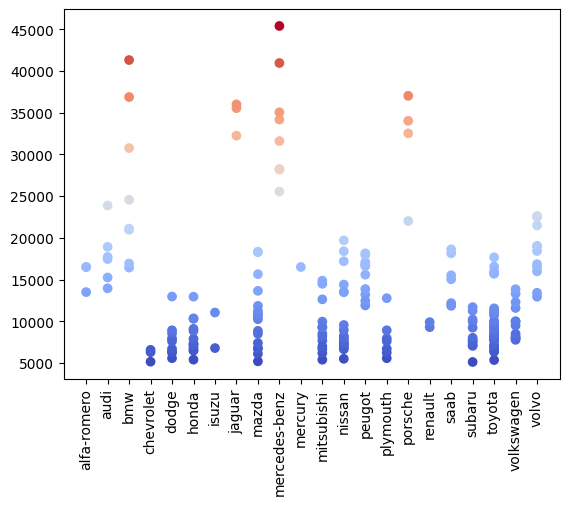

In [36]:
import matplotlib.pyplot as plt

with open("..\\..\\data\\autos_json.json") as file:
    data = file.read()

cars = json.loads(data)

print(len(cars))
print(cars[0])

for key, value in cars[0].items():
    print(f"{key} = {value}")

brands = set([car["make"] for car in cars])

for brand in sorted(brands):
    print(brand)

makes = [car["make"] for car in cars]
prices = [car["price"] for car in cars]

cmap = plt.cm.coolwarm
inferno_cmap = plt.cm.coolwarm

plt.xticks(rotation=90)
plt.scatter(makes,prices,c=prices, cmap=cmap)
plt.show()